In [15]:
import cv2
import numpy as np

import PIL 

def subtract_and_extract(image1_path, image2_path, output_path):
    # Read the two images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Ensure the images have the same dimensions
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Compute the absolute difference between the two images
    diff = cv2.absdiff(image1, image2)

    # Convert the difference image to grayscale
    gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale difference image to create a binary mask
    _, mask = cv2.threshold(gray_diff, 40, 258, cv2.THRESH_BINARY)

    # Invert the mask to keep the differing regions
    inv_mask = cv2.bitwise_not(mask)

    # Extract the remaining region by applying the inverted mask to the first image
    remaining_region = cv2.bitwise_and(image1, image1, mask=inv_mask)

    # Save the result
    cv2.imwrite(output_path, remaining_region)

# Example usage
image1_path = r"D:\Computer Vision Project\MicrosoftTeams-image (16).png"
image2_path = r"D:\Computer Vision Project\MicrosoftTeams-image (17).png"
output_path = r"D:\Computer Vision Project\New_output.png"

subtract_and_extract(image1_path, image2_path, output_path)






In [17]:
import cv2
import numpy as np

def extract_non_overlapping_difference(image1_path, image2_path, output_path):
    # Read the two images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Ensure the images have the same dimensions
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Compute the bitwise XOR between the two images
    xor_result = cv2.bitwise_xor(image1, image2)

    # Convert the XOR result to grayscale
    gray_xor = cv2.cvtColor(xor_result, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale XOR image to create a binary mask
    _, mask = cv2.threshold(gray_xor, 30, 255, cv2.THRESH_BINARY)

    # Invert the mask to keep the differing regions
    inv_mask = cv2.bitwise_not(mask)

    # Extract the remaining region by applying the inverted mask to the first image
    remaining_region = cv2.bitwise_and(image1, image1, mask=inv_mask)

    # Save the result
    cv2.imwrite(output_path, remaining_region)

# Example usage
image1_path = r"D:\Computer Vision Project\MicrosoftTeams-image (16).png"
image2_path = r"D:\Computer Vision Project\MicrosoftTeams-image (17).png"
output_path = r"D:\Computer Vision Project\white_image.jpg"

extract_non_overlapping_difference(image1_path, image2_path, output_path)


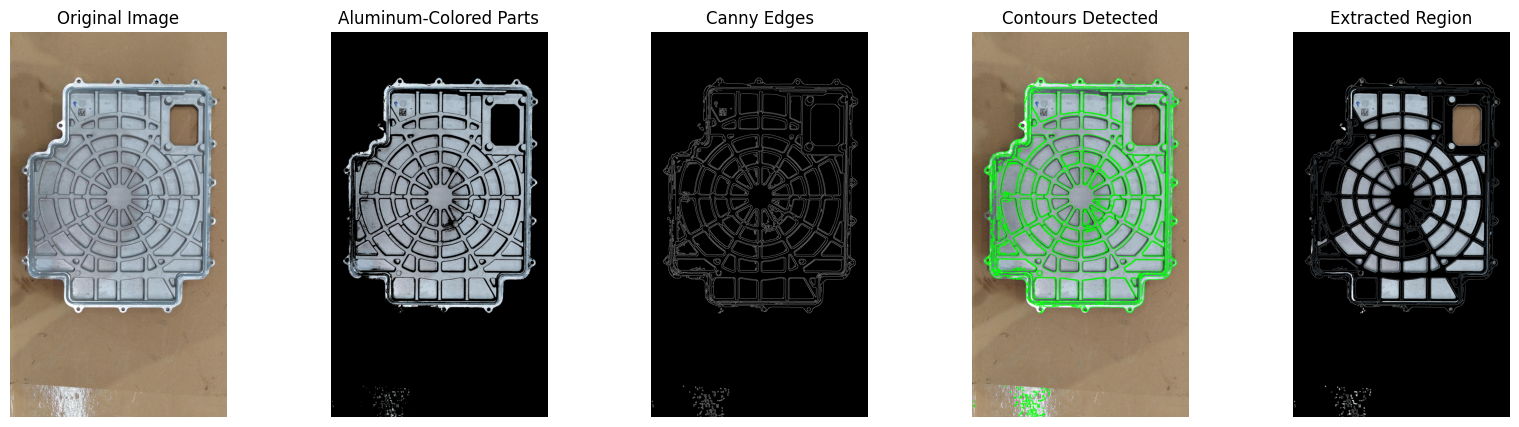

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def extract_inside_contours(image, contours):
    # Create an empty mask
    mask = np.zeros_like(image)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Extract the region inside the contours using the mask
    result = cv2.bitwise_and(image, mask)

    return result

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)
   
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([30, 10, 140])
    upper_aluminum = np.array([179, 200, 255])

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Bitwise AND to obtain the aluminum-colored parts in the original image
    aluminum_parts = cv2.bitwise_and(img, img, mask=mask)

    # Convert the aluminum-colored parts to grayscale
    gray_aluminum = cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the grayscale image with a larger kernel size
    blurred = cv2.GaussianBlur(gray_aluminum, (9, 9), 0)

    # Use Canny edge detection with adjusted parameters
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming you want to extract all contours found
    if contours:
        # Draw the contours on the original image
        img_with_contours = img.copy()
        cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

        # Extract the region inside the contours
        extracted_region = extract_inside_contours(img, contours)

        # Display the original image, aluminum-colored parts, edges, contours, and extracted region
        plt.figure(figsize=(20, 5))

        plt.subplot(1, 5, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 5, 2)
        plt.imshow(cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2RGB))
        plt.title('Aluminum-Colored Parts')
        plt.axis('off')

        plt.subplot(1, 5, 3)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
        plt.title('Contours Detected')
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.imshow(cv2.cvtColor(extracted_region, cv2.COLOR_BGR2RGB))
        plt.title('Extracted Region')
        plt.axis('off')

        plt.show()

# Set the path to your image
image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (17).png'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)



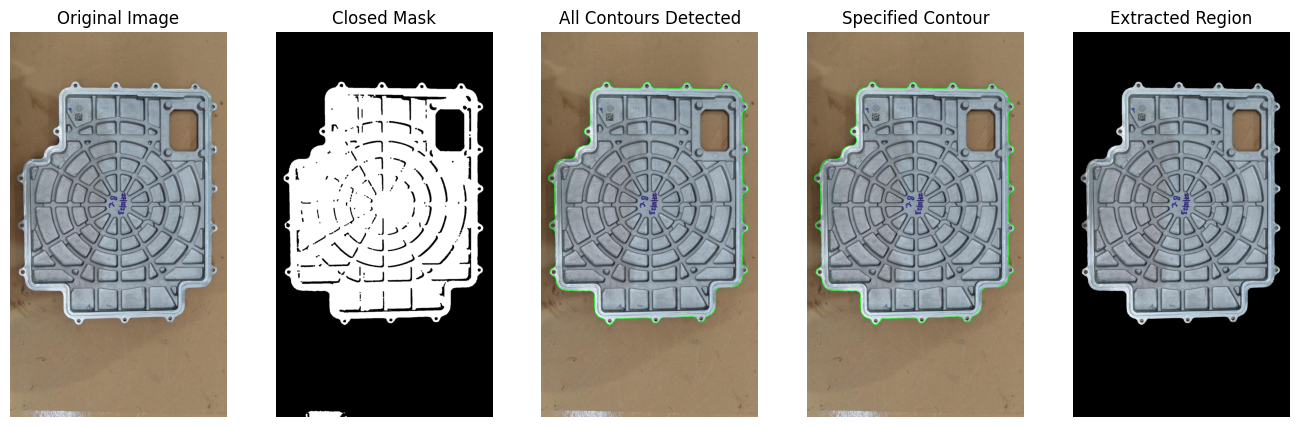

In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def extract_inside_contour(image, contour):
    # Create an empty mask
    mask = np.zeros_like(image)

    # Draw the specified contour on the mask
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Extract the region inside the specified contour using the mask
    result = cv2.bitwise_and(image, mask)

    return result

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([50, 0, 100])
    upper_aluminum = np.array([240, 255, 255])

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Apply morphological closing to better connect the edges
    kernel = np.ones((5, 5), np.uint8)
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed mask using RETR_TREE retrieval mode
    contours, _ = cv2.findContours(mask_closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Assuming you want to extract the largest contour
    if contours:
        specified_contour = contours[0]

        # Draw the specified contour on the original image
        img_with_contours = img.copy()
        cv2.drawContours(img_with_contours, [specified_contour], -1, (0, 255, 0), 2)

        # Extract the region inside the specified contour
        extracted_region = extract_inside_contour(img, specified_contour)
        
        cv2.imwrite('Extracted Casing.jpg',extracted_region)

        # Display the original image, aluminum-colored parts, closed mask, contours, specified contour, and extracted region
        plt.figure(figsize=(20, 5))

        plt.subplot(1, 6, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 6, 2)
        plt.imshow(mask_closed, cmap='gray')
        plt.title('Closed Mask')
        plt.axis('off')

        plt.subplot(1, 6, 3)
        plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
        plt.title('All Contours Detected')
        plt.axis('off')

        plt.subplot(1, 6, 4)
        plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
        plt.title('Specified Contour')
        plt.axis('off')

        plt.subplot(1, 6, 5)
        plt.imshow(cv2.cvtColor(extracted_region, cv2.COLOR_BGR2RGB))
        plt.title('Extracted Region')
        plt.axis('off')

        plt.show()
    else:
        print("No contours found.")

# Set the new path to your image
image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (16).png'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)





1/1 [==============================] - 0s 180ms/step


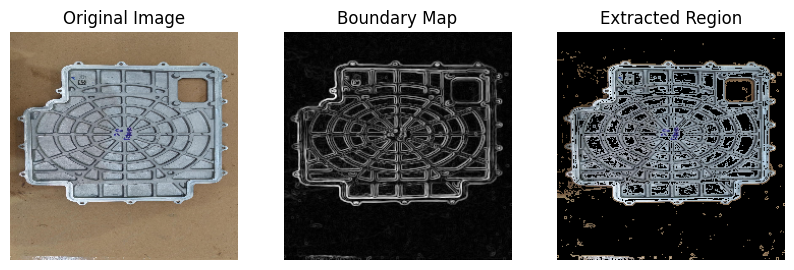

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# Step 1: Load and preprocess the image
image_path = "D:\Computer Vision Project\MicrosoftTeams-image (16).png"
original_image = cv2.imread(image_path)
resized_image = cv2.resize(original_image, (224, 224))
input_image = preprocess_input(resized_image)

# Step 2: Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet')

# Step 3: Feature extraction
features = vgg_model.predict(np.expand_dims(input_image, axis=0))

# Step 4: Boundary Detection (a simplified example using a Sobel filter)
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
boundary_map = np.sqrt(sobel_x**2 + sobel_y**2)

# Step 5: Mask Generation
threshold = 50  # Adjust as needed
binary_mask = (boundary_map > threshold).astype(np.uint8)

# Step 6: Image Extraction
extracted_image = cv2.bitwise_and(resized_image, resized_image, mask=binary_mask)

cv2.imwrite('extracted_output.jpg', extracted_image)


# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(boundary_map, cmap='gray')
plt.title('Boundary Map')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB))
plt.title('Extracted Region')
plt.axis('off')

plt.show()


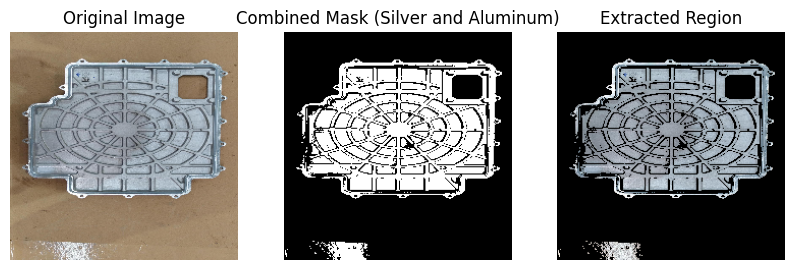

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

def extract_silver_and_aluminum(image_path):
    # Read the image
    original_image = cv2.imread(image_path)
    resized_image = cv2.resize(original_image, (224, 224))

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

    # Define the color ranges for silver and aluminum
    lower_silver = np.array([0, 0, 150])
    upper_silver = np.array([179, 30, 255])

    lower_aluminum = np.array([30, 0, 140])
    upper_aluminum = np.array([179, 200, 255])

    # Create masks for silver and aluminum
    mask_silver = cv2.inRange(hsv_image, lower_silver, upper_silver)
    mask_aluminum = cv2.inRange(hsv_image, lower_aluminum, upper_aluminum)

    # Combine the masks
    combined_mask = cv2.bitwise_or(mask_silver, mask_aluminum)

    # Apply the combined mask to the original image
    extracted_image = cv2.bitwise_and(resized_image, resized_image, mask=combined_mask)

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('Combined Mask (Silver and Aluminum)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB))
    plt.title('Extracted Region')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (17).png'

# Call the function to extract silver and aluminum colors and display the images
extract_silver_and_aluminum(image_path)


1/1 [==============================] - 0s 227ms/step


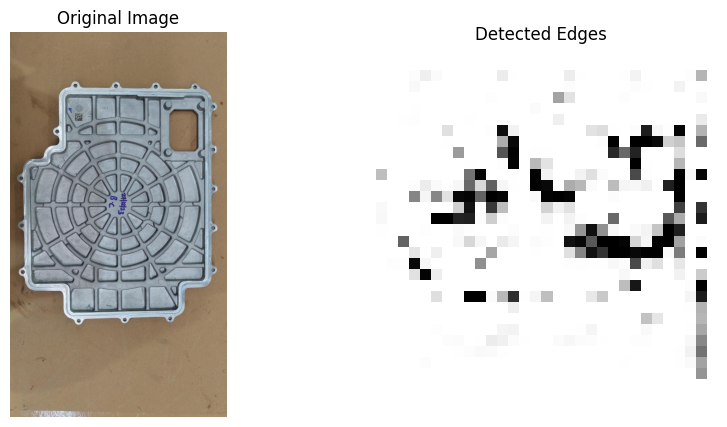

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, concatenate

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create the HED model based on VGG19
def hed_model():
    # Use the first 19 layers of VGG19
    vgg19_layers = base_model.layers[:19]

    # Additional layers for edge detection
    x = Conv2D(1, (1, 1), activation='sigmoid')(vgg19_layers[-1].output)
    x = Conv2DTranspose(1, (4, 4), strides=(2, 2), padding='same')(x)

    # Skip connection from layer 14 (pool3)
    skip_connection = vgg19_layers[14].output
    x = concatenate([x, skip_connection], axis=-1)

    # Additional convolutional layer
    x = Conv2D(1, (1, 1), activation='sigmoid')(x)

    # Create the final HED model
    hed = Model(inputs=base_model.input, outputs=x)

    return hed

# Load the HED model
hed = hed_model()

# Load and preprocess the image
image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (16).png'
image = cv2.imread(image_path)
image = cv2.resize(image, (256, 256))
image = np.expand_dims(image, axis=0)
image = image / 255.0  # Normalize pixel values to the range [0, 1]

# Perform edge detection using HED
edges = hed.predict(image)

# Display the original image and the detected edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges[0, :, :, 0], cmap='gray')
plt.title('Detected Edges')
plt.axis('off')

plt.show()


In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def overlay_boundary(background_path, boundary_path, output_path):
    # Read the background image and the boundary image
    background = cv2.imread(background_path)
    boundary = cv2.imread(boundary_path, cv2.IMREAD_UNCHANGED)

    # Ensure the boundary image has the same dimensions as the background image
    boundary_resized = cv2.resize(boundary, (background.shape[1], background.shape[0]))

    # Extract the alpha channel from the boundary image
    alpha_channel = boundary_resized[:, :, 3]

    # Create a mask from the alpha channel
    mask = alpha_channel[:, :, np.newaxis]

    # Invert the mask
    inverted_mask = cv2.bitwise_not(mask)

    # Extract the region inside the boundary from the background image
    background_inside_boundary = cv2.bitwise_and(background, inverted_mask)

    # Extract the boundary region from the resized boundary image
    boundary_region = cv2.bitwise_and(boundary_resized, mask)

    # Overlay the boundary on the background
    output_image = cv2.add(background_inside_boundary, boundary_region)

    # Save or display the output image
    cv2.imwrite(output_path, output_image)

    # Display the images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
    plt.title('Background Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Overlayed Image')
    plt.axis('off')

    plt.show()

   
# Set the paths for the background image, boundary image, and output image
background_image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (16).png'
boundary_image_path = r"C:\Users\167093\Pictures\Screenshots\Screenshot 2023-12-30 110138.png"
output_image_path = r'D:\Computer Vision Project\Image.jpg'

# Call the function to overlay the boundary on the background image
overlay_boundary(background_image_path, boundary_image_path, output_image_path)



error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


1/1 [==============================] - 0s 243ms/step


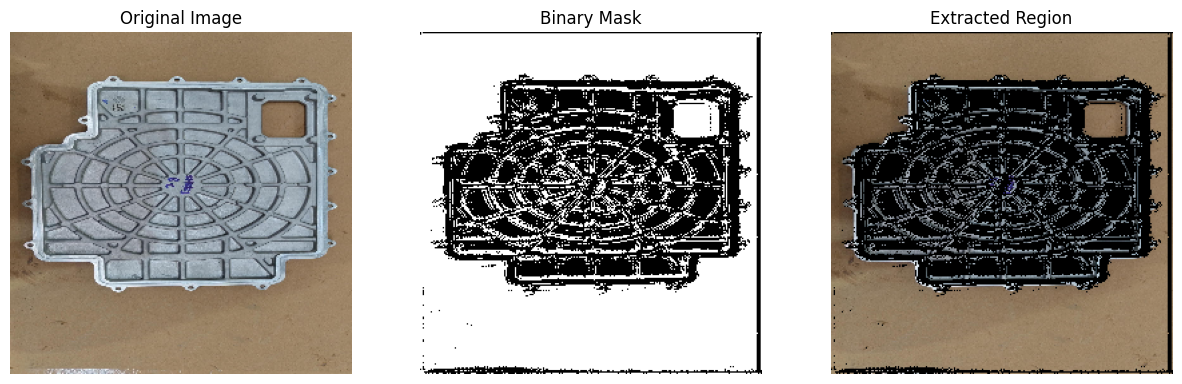

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottom
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Expansive path
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = Conv2D(256, 2, activation='relu', padding='same')(up5)
    merge5 = concatenate([conv3, up5], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(merge5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Conv2D(128, 2, activation='relu', padding='same')(up6)
    merge6 = concatenate([conv2, up6], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Conv2D(64, 2, activation='relu', padding='same')(up7)
    merge7 = concatenate([conv1, up7], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
    output = Conv2D(1, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=output)
    return model

# Load the U-Net model
model = unet_model()

# Load the weights (pre-trained or train the model as needed)
# model.load_weights('path/to/weights.h5')

# Load the image and preprocess
image = cv2.imread(r'D:\Computer Vision Project\MicrosoftTeams-image (16).png')
image = cv2.resize(image, (256, 256))
image = image / 255.0  # Normalize pixel values to the range [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = (image * 255).astype(np.uint8)


# Predict segmentation mask
mask = model.predict(image)

# Threshold the mask to obtain binary segmentation
binary_mask = (mask > 0.5).astype(np.uint8)

# Apply the binary mask to extract the region inside the boundary
result = cv2.bitwise_and(image[0], image[0], mask=binary_mask[0])

# Display the original image, binary mask, and the extracted region
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask[0, :, :, 0], cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Extracted Region')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 124ms/step


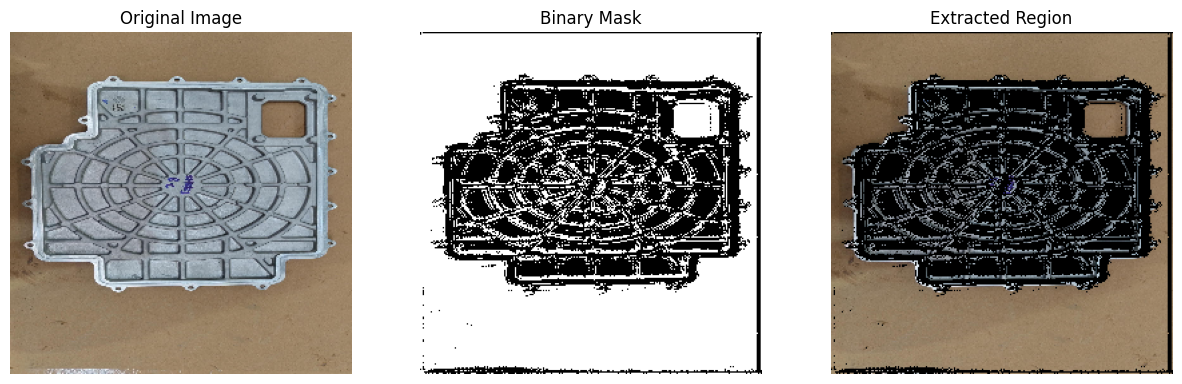

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    # ... (same as before)

# Load the U-Net model
  inputs = Input(input_size)

    # Contracting path
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
  conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
  conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

  conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
  conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottom
  conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
  conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Expansive path
  up5 = UpSampling2D(size=(2, 2))(conv4)
  up5 = Conv2D(256, 2, activation='relu', padding='same')(up5)
  merge5 = concatenate([conv3, up5], axis=3)
  conv5 = Conv2D(256, 3, activation='relu', padding='same')(merge5)
  conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

  up6 = UpSampling2D(size=(2, 2))(conv5)
  up6 = Conv2D(128, 2, activation='relu', padding='same')(up6)
  merge6 = concatenate([conv2, up6], axis=3)
  conv6 = Conv2D(128, 3, activation='relu', padding='same')(merge6)
  conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

  up7 = UpSampling2D(size=(2, 2))(conv6)
  up7 = Conv2D(64, 2, activation='relu', padding='same')(up7)
  merge7 = concatenate([conv1, up7], axis=3)
  conv7 = Conv2D(64, 3, activation='relu', padding='same')(merge7)
  conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
  output = Conv2D(1, 1, activation='sigmoid')(conv7)

  model = Model(inputs=inputs, outputs=output)
  return model


# Load the weights (pre-trained or train the model as needed)
# model.load_weights('path/to/weights.h5')

# Load the image and preprocess
image = cv2.imread(r'D:\Computer Vision Project\MicrosoftTeams-image (16).png')
image = cv2.resize(image, (256, 256))
image = image / 255.0  # Normalize pixel values to the range [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = (image * 255).astype(np.uint8)


# Predict segmentation mask
mask = model.predict(image)

# Threshold the mask to obtain binary segmentation
binary_mask = (mask > 0.5).astype(np.uint8)

# Apply the binary mask to extract the region inside the boundary
result = cv2.bitwise_and(image[0], image[0], mask=binary_mask[0])

# Display the original image, binary mask, and the extracted region
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask[0, :, :, 0], cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Extracted Region')
plt.axis('off')

plt.show()
